In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from scipy import stats

In [2]:
#Remove unnecessary columns
#Remove duplicates
#Change some characters format
#Make phone numbers for example in the right format
#Split some columns
#yes/No
#null
#Reset index

In [3]:
df=pd.read_csv("imdb.csv")
df

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
0,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN
1,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0
2,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0
3,Life of Brian,MOVIE,1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0
4,The Exorcist,MOVIE,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0
...,...,...,...,...,...,...,...,...,...,...,...
5801,Fine Wine,MOVIE,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.9,39.0
5802,Edis Starlight,MOVIE,2021,NaN,74,"['music', 'documentation']",[],NaN,NaN,NaN,NaN
5803,Clash,MOVIE,2021,NaN,88,"['family', 'drama']","['NG', 'CA']",NaN,tt14620732,6.5,32.0
5804,Shadow Parties,MOVIE,2021,NaN,116,"['action', 'thriller']",[],NaN,tt10168094,6.2,9.0


# Data Cleaning

Drop Columns

In [4]:
df.columns

Index(['title', 'type', 'release_year', 'age_certification', 'runtime',
       'genres', 'production_countries', 'seasons', 'imdb_id', 'imdb_score',
       'imdb_votes'],
      dtype='object')

In [5]:
df=df[['title', 'type', 'release_year', #'age_certification', #'runtime',
       'genres', #'production_countries'
    #, 'seasons'
    #, 'imdb_id', 
    'imdb_score',
       'imdb_votes']]

In [6]:
df

,title,type,release_year,genres,imdb_score,imdb_votes
0,Five Came Back: The Reference Films,SHOW,1945,['documentation'],NaN,NaN
1,Taxi Driver,MOVIE,1976,"['crime', 'drama']",8.3,795222.0
2,Monty Python and the Holy Grail,MOVIE,1975,"['comedy', 'fantasy']",8.2,530877.0
3,Life of Brian,MOVIE,1979,['comedy'],8.0,392419.0
4,The Exorcist,MOVIE,1973,['horror'],8.1,391942.0
...,...,...,...,...,...,...
5801,Fine Wine,MOVIE,2021,"['romance', 'drama']",6.9,39.0
5802,Edis Starlight,MOVIE,2021,"['music', 'documentation']",NaN,NaN
5803,Clash,MOVIE,2021,"['family', 'drama']",6.5,32.0
5804,Shadow Parties,MOVIE,2021,"['action', 'thriller']",6.2,9.0


Drop Duplicates

In [7]:
df=df.drop_duplicates()
df

,title,type,release_year,genres,imdb_score,imdb_votes
0,Five Came Back: The Reference Films,SHOW,1945,['documentation'],NaN,NaN
1,Taxi Driver,MOVIE,1976,"['crime', 'drama']",8.3,795222.0
2,Monty Python and the Holy Grail,MOVIE,1975,"['comedy', 'fantasy']",8.2,530877.0
3,Life of Brian,MOVIE,1979,['comedy'],8.0,392419.0
4,The Exorcist,MOVIE,1973,['horror'],8.1,391942.0
...,...,...,...,...,...,...
5801,Fine Wine,MOVIE,2021,"['romance', 'drama']",6.9,39.0
5802,Edis Starlight,MOVIE,2021,"['music', 'documentation']",NaN,NaN
5803,Clash,MOVIE,2021,"['family', 'drama']",6.5,32.0
5804,Shadow Parties,MOVIE,2021,"['action', 'thriller']",6.2,9.0


In [8]:
df["type"].value_counts()

MOVIE    3759
SHOW     2047
Name: type, dtype: int64

In [9]:
df["release_year"].value_counts()

2019    848
2020    805
2018    774
2021    758
2017    580
       ... 
1974      1
1959      1
1962      1
1978      1
1945      1
Name: release_year, Length: 67, dtype: int64

In [10]:
df["genres"].value_counts()

['comedy']                                            510
['drama']                                             350
['documentation']                                     320
['comedy', 'drama']                                   141
['drama', 'comedy']                                   128
                                                     ... 
['drama', 'family', 'comedy', 'music']                  1
['drama', 'thriller', 'western']                        1
['comedy', 'thriller', 'drama', 'action', 'crime']      1
['romance', 'drama', 'history', 'european']             1
['family', 'comedy', 'animation']                       1
Name: genres, Length: 1626, dtype: int64

In [11]:
df.head()

,title,type,release_year,genres,imdb_score,imdb_votes
0,Five Came Back: The Reference Films,SHOW,1945,['documentation'],NaN,NaN
1,Taxi Driver,MOVIE,1976,"['crime', 'drama']",8.3,795222.0
2,Monty Python and the Holy Grail,MOVIE,1975,"['comedy', 'fantasy']",8.2,530877.0
3,Life of Brian,MOVIE,1979,['comedy'],8.0,392419.0
4,The Exorcist,MOVIE,1973,['horror'],8.1,391942.0


In [12]:
df["genres"]=df["genres"].str.strip("123[]")

In [13]:
df

,title,type,release_year,genres,imdb_score,imdb_votes
0,Five Came Back: The Reference Films,SHOW,1945,'documentation',NaN,NaN
1,Taxi Driver,MOVIE,1976,"'crime', 'drama'",8.3,795222.0
2,Monty Python and the Holy Grail,MOVIE,1975,"'comedy', 'fantasy'",8.2,530877.0
3,Life of Brian,MOVIE,1979,'comedy',8.0,392419.0
4,The Exorcist,MOVIE,1973,'horror',8.1,391942.0
...,...,...,...,...,...,...
5801,Fine Wine,MOVIE,2021,"'romance', 'drama'",6.9,39.0
5802,Edis Starlight,MOVIE,2021,"'music', 'documentation'",NaN,NaN
5803,Clash,MOVIE,2021,"'family', 'drama'",6.5,32.0
5804,Shadow Parties,MOVIE,2021,"'action', 'thriller'",6.2,9.0


In [14]:
df["genres"]=df["genres"].str.replace("'","")

In [15]:
df

,title,type,release_year,genres,imdb_score,imdb_votes
0,Five Came Back: The Reference Films,SHOW,1945,documentation,NaN,NaN
1,Taxi Driver,MOVIE,1976,"crime, drama",8.3,795222.0
2,Monty Python and the Holy Grail,MOVIE,1975,"comedy, fantasy",8.2,530877.0
3,Life of Brian,MOVIE,1979,comedy,8.0,392419.0
4,The Exorcist,MOVIE,1973,horror,8.1,391942.0
...,...,...,...,...,...,...
5801,Fine Wine,MOVIE,2021,"romance, drama",6.9,39.0
5802,Edis Starlight,MOVIE,2021,"music, documentation",NaN,NaN
5803,Clash,MOVIE,2021,"family, drama",6.5,32.0
5804,Shadow Parties,MOVIE,2021,"action, thriller",6.2,9.0


In [16]:
df[["Genres_1","Genres_2"]]=df["genres"].str.split(',',1,expand=True)

In [17]:
df

,title,type,release_year,genres,imdb_score,imdb_votes,Genres_1,Genres_2
0,Five Came Back: The Reference Films,SHOW,1945,documentation,NaN,NaN,documentation,None
1,Taxi Driver,MOVIE,1976,"crime, drama",8.3,795222.0,crime,drama
2,Monty Python and the Holy Grail,MOVIE,1975,"comedy, fantasy",8.2,530877.0,comedy,fantasy
3,Life of Brian,MOVIE,1979,comedy,8.0,392419.0,comedy,None
4,The Exorcist,MOVIE,1973,horror,8.1,391942.0,horror,None
...,...,...,...,...,...,...,...,...
5801,Fine Wine,MOVIE,2021,"romance, drama",6.9,39.0,romance,drama
5802,Edis Starlight,MOVIE,2021,"music, documentation",NaN,NaN,music,documentation
5803,Clash,MOVIE,2021,"family, drama",6.5,32.0,family,drama
5804,Shadow Parties,MOVIE,2021,"action, thriller",6.2,9.0,action,thriller


In [18]:
df.drop(columns=["genres","Genres_2"],inplace=True)

In [19]:
df

,title,type,release_year,imdb_score,imdb_votes,Genres_1
0,Five Came Back: The Reference Films,SHOW,1945,NaN,NaN,documentation
1,Taxi Driver,MOVIE,1976,8.3,795222.0,crime
2,Monty Python and the Holy Grail,MOVIE,1975,8.2,530877.0,comedy
3,Life of Brian,MOVIE,1979,8.0,392419.0,comedy
4,The Exorcist,MOVIE,1973,8.1,391942.0,horror
...,...,...,...,...,...,...
5801,Fine Wine,MOVIE,2021,6.9,39.0,romance
5802,Edis Starlight,MOVIE,2021,NaN,NaN,music
5803,Clash,MOVIE,2021,6.5,32.0,family
5804,Shadow Parties,MOVIE,2021,6.2,9.0,action


In [20]:
df.rename(columns={'Genres_1': 'genres'},inplace=True)

In [21]:
df

,title,type,release_year,imdb_score,imdb_votes,genres
0,Five Came Back: The Reference Films,SHOW,1945,NaN,NaN,documentation
1,Taxi Driver,MOVIE,1976,8.3,795222.0,crime
2,Monty Python and the Holy Grail,MOVIE,1975,8.2,530877.0,comedy
3,Life of Brian,MOVIE,1979,8.0,392419.0,comedy
4,The Exorcist,MOVIE,1973,8.1,391942.0,horror
...,...,...,...,...,...,...
5801,Fine Wine,MOVIE,2021,6.9,39.0,romance
5802,Edis Starlight,MOVIE,2021,NaN,NaN,music
5803,Clash,MOVIE,2021,6.5,32.0,family
5804,Shadow Parties,MOVIE,2021,6.2,9.0,action


In [22]:
df["genres"].value_counts()

drama            1432
comedy           1310
documentation     588
thriller          442
action            292
scifi             289
romance           265
crime             254
animation         232
reality           176
fantasy           143
horror            121
                   68
family             66
music              50
war                43
western            22
history             9
sport               4
Name: genres, dtype: int64

In [23]:
df

,title,type,release_year,imdb_score,imdb_votes,genres
0,Five Came Back: The Reference Films,SHOW,1945,NaN,NaN,documentation
1,Taxi Driver,MOVIE,1976,8.3,795222.0,crime
2,Monty Python and the Holy Grail,MOVIE,1975,8.2,530877.0,comedy
3,Life of Brian,MOVIE,1979,8.0,392419.0,comedy
4,The Exorcist,MOVIE,1973,8.1,391942.0,horror
...,...,...,...,...,...,...
5801,Fine Wine,MOVIE,2021,6.9,39.0,romance
5802,Edis Starlight,MOVIE,2021,NaN,NaN,music
5803,Clash,MOVIE,2021,6.5,32.0,family
5804,Shadow Parties,MOVIE,2021,6.2,9.0,action


In [24]:
df["type"].value_counts()

MOVIE    3759
SHOW     2047
Name: type, dtype: int64

In [25]:
df.loc[df["type"]=='SHOW']

,title,type,release_year,imdb_score,imdb_votes,genres
0,Five Came Back: The Reference Films,SHOW,1945,NaN,NaN,documentation
5,Monty Python's Flying Circus,SHOW,1969,8.8,72895.0,comedy
29,Monty Python's Fliegender Zirkus,SHOW,1972,8.1,2144.0,comedy
47,Seinfeld,SHOW,1989,8.9,302700.0,comedy
55,Knight Rider,SHOW,1982,6.9,33760.0,action
...,...,...,...,...,...,...
5793,Glimpses of a Future,SHOW,2021,NaN,NaN,
5794,Masameer County,SHOW,2021,NaN,NaN,
5796,The Big Day,SHOW,2021,4.6,327.0,reality
5799,HQ Barbers,SHOW,2021,NaN,NaN,comedy


In [26]:
df=df.loc[~df['type'].str.contains("SHOW")]

In [27]:
df["type"].value_counts()

MOVIE    3759
Name: type, dtype: int64

In [28]:
df=df[~df["title"].isnull()]

In [29]:
df.head()

,title,type,release_year,imdb_score,imdb_votes,genres
1,Taxi Driver,MOVIE,1976,8.3,795222.0,crime
2,Monty Python and the Holy Grail,MOVIE,1975,8.2,530877.0,comedy
3,Life of Brian,MOVIE,1979,8.0,392419.0,comedy
4,The Exorcist,MOVIE,1973,8.1,391942.0,horror
6,Dirty Harry,MOVIE,1971,7.7,153463.0,thriller


In [30]:
df=df.reset_index(drop=True)
df

,title,type,release_year,imdb_score,imdb_votes,genres
0,Taxi Driver,MOVIE,1976,8.3,795222.0,crime
1,Monty Python and the Holy Grail,MOVIE,1975,8.2,530877.0,comedy
2,Life of Brian,MOVIE,1979,8.0,392419.0,comedy
3,The Exorcist,MOVIE,1973,8.1,391942.0,horror
4,Dirty Harry,MOVIE,1971,7.7,153463.0,thriller
...,...,...,...,...,...,...
3753,Momshies! Your Soul is Mine,MOVIE,2021,5.8,26.0,comedy
3754,Fine Wine,MOVIE,2021,6.9,39.0,romance
3755,Edis Starlight,MOVIE,2021,NaN,NaN,music
3756,Clash,MOVIE,2021,6.5,32.0,family


In [31]:
df = df.dropna(axis=0, how='any')


In [32]:
df.isna().sum()

title           0
type            0
release_year    0
imdb_score      0
imdb_votes      0
genres          0
dtype: int64

# Exploratory data analysis

## General Estimation

In [33]:
df.head()

,title,type,release_year,imdb_score,imdb_votes,genres
0,Taxi Driver,MOVIE,1976,8.3,795222.0,crime
1,Monty Python and the Holy Grail,MOVIE,1975,8.2,530877.0,comedy
2,Life of Brian,MOVIE,1979,8.0,392419.0,comedy
3,The Exorcist,MOVIE,1973,8.1,391942.0,horror
4,Dirty Harry,MOVIE,1971,7.7,153463.0,thriller


In [34]:
df['imdb_votes'].mean()

26683.217045119432

In [35]:
#Weighted mean
np.average(df['imdb_votes'],weights=df['imdb_score'])

30209.57419950015

In [36]:
np.average(df['imdb_score'],weights=df['imdb_votes'])

7.093455468089076

In [37]:
#median
df['imdb_votes'].median()

2632.0

In [38]:
#Weighted median

def weighted_median(df,median_col,weight_col):
    df_sorted = df.sort_values(median_col)
    cumsum = df_sorted[weight_col].cumsum()
    cutoff=df_sorted[weight_col].sum() / 2.
    return df_sorted[cumsum >= cutoff][median_col].iloc[0]
total_votes = df['imdb_votes'].sum()
weighted_median(df,"imdb_votes","imdb_score")

2846.0

In [39]:
q3 = np.percentile(df["imdb_votes"],75)
q3

12281.0

In [40]:
df.describe()

,release_year,imdb_score,imdb_votes
count,3391.000000,3391.000000,3.391000e+03
mean,2015.183427,6.265438,2.668322e+04
std,8.235328,1.117526,9.471002e+04
min,1953.000000,1.500000,5.000000e+00
25%,2014.000000,5.600000,5.730000e+02
50%,2018.000000,6.400000,2.632000e+03
75%,2020.000000,7.100000,1.228100e+04
max,2022.000000,9.000000,2.268288e+06


## Estimates of Variability (Dispersion Metrics)

In [41]:
#Vairence
from statistics import variance

variance(df["imdb_votes"])

8969988089.52043

In [42]:
#Standard Deviation
from statistics import stdev

stdev(df["imdb_votes"])

94710.02106176743

In [43]:
#Mean absolute deviation

from numpy import mean,absolute

mean(absolute(df["imdb_votes"] - mean(df["imdb_votes"])))

37708.22254373815

In [44]:
#Median absolute deviation
from numpy import median

median(absolute(df["imdb_votes"] - median(df["imdb_votes"])))

2436.0

In [45]:
df.head()

,title,type,release_year,imdb_score,imdb_votes,genres
0,Taxi Driver,MOVIE,1976,8.3,795222.0,crime
1,Monty Python and the Holy Grail,MOVIE,1975,8.2,530877.0,comedy
2,Life of Brian,MOVIE,1979,8.0,392419.0,comedy
3,The Exorcist,MOVIE,1973,8.1,391942.0,horror
4,Dirty Harry,MOVIE,1971,7.7,153463.0,thriller


In [46]:
# Interquantile Range
q3 , q1 = np.percentile(df["imdb_votes"],[75 ,25])
iqr = q3 - q1
iqr

11708.0

## Exploring the data distribution

<AxesSubplot:>

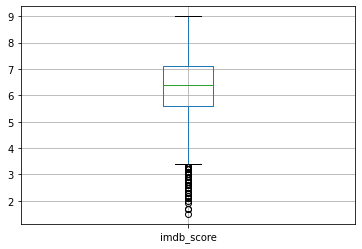

In [47]:
df.boxplot(column="imdb_score",by=None,ax=None)

In [48]:
df.head()

,title,type,release_year,imdb_score,imdb_votes,genres
0,Taxi Driver,MOVIE,1976,8.3,795222.0,crime
1,Monty Python and the Holy Grail,MOVIE,1975,8.2,530877.0,comedy
2,Life of Brian,MOVIE,1979,8.0,392419.0,comedy
3,The Exorcist,MOVIE,1973,8.1,391942.0,horror
4,Dirty Harry,MOVIE,1971,7.7,153463.0,thriller


In [49]:
# Frequancy Table
frequancy_table = df.copy()
frequancy_table['freq'] = pd.cut(df["imdb_votes"],10)
frequancy_table.groupby("freq")["imdb_score"].count().reset_index()

,freq,imdb_score
0,"(-2263.283, 226833.3]",3298
1,"(226833.3, 453661.6]",62
2,"(453661.6, 680489.9]",21
3,"(680489.9, 907318.2]",6
4,"(907318.2, 1134146.5]",0
5,"(1134146.5, 1360974.8]",1
6,"(1360974.8, 1587803.1]",1
7,"(1587803.1, 1814631.4]",0
8,"(1814631.4, 2041459.7]",1
9,"(2041459.7, 2268288.0]",1


(array([  1.,   2.,   2.,   4.,   4.,   8.,   8.,  11.,   8.,  17.,  16.,
         22.,  31.,  23.,  56.,  62.,  80.,  68., 130., 161., 195., 200.,
        185., 245., 258., 268., 236., 222., 227., 203., 143., 110.,  69.,
         62.,  29.,  13.,   8.,   4.]),
 array([1.5       , 1.69736842, 1.89473684, 2.09210526, 2.28947368,
        2.48684211, 2.68421053, 2.88157895, 3.07894737, 3.27631579,
        3.47368421, 3.67105263, 3.86842105, 4.06578947, 4.26315789,
        4.46052632, 4.65789474, 4.85526316, 5.05263158, 5.25      ,
        5.44736842, 5.64473684, 5.84210526, 6.03947368, 6.23684211,
        6.43421053, 6.63157895, 6.82894737, 7.02631579, 7.22368421,
        7.42105263, 7.61842105, 7.81578947, 8.01315789, 8.21052632,
        8.40789474, 8.60526316, 8.80263158, 9.        ]),
 <BarContainer object of 38 artists>)

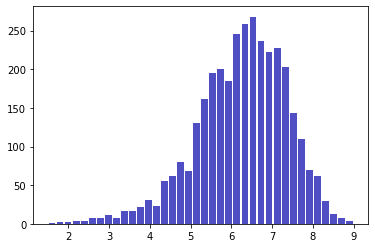

In [50]:
plt.hist(x=df["imdb_score"],bins='auto',color='#0504aa',alpha=0.7,rwidth=0.85)

<AxesSubplot:ylabel='Density'>

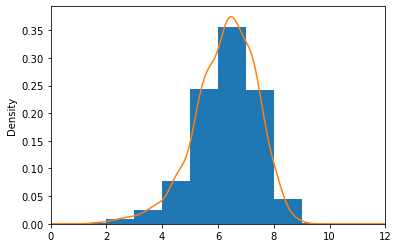

In [51]:
# Density plot
ax = df["imdb_score"].plot.hist(density=True,xlim=[0,12],bins=range(1,12))
df["imdb_score"].plot.density(ax=ax)

## Exploring Binary and Categorical Data

In [52]:
df['imdb_votes'].mode()

0    43.0
dtype: float64

In [53]:
df.head()

,title,type,release_year,imdb_score,imdb_votes,genres
0,Taxi Driver,MOVIE,1976,8.3,795222.0,crime
1,Monty Python and the Holy Grail,MOVIE,1975,8.2,530877.0,comedy
2,Life of Brian,MOVIE,1979,8.0,392419.0,comedy
3,The Exorcist,MOVIE,1973,8.1,391942.0,horror
4,Dirty Harry,MOVIE,1971,7.7,153463.0,thriller


Text(0, 0.5, 'imdb score')

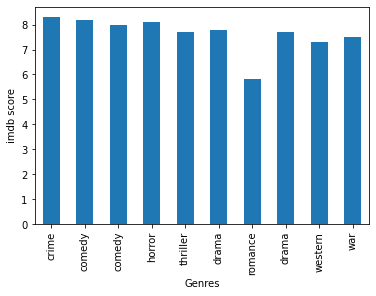

In [54]:
#Bar Chart
ax = df.iloc[:10,:].plot.bar(x="genres",y="imdb_score",legend=False)
ax.set_xlabel('Genres')
ax.set_ylabel('imdb score')

([<matplotlib.patches.Wedge at 0x20a4b303160>,
 [Text(-0.5116321768078584, 0.9737723120190123, 'crime'),
  Text(-1.0913743325686953, 0.13748478537727293, 'comedy'),
  Text(-0.7513175040445834, -0.8034438425404837, 'comedy'),
  Text(0.20397799045095064, -1.0809222818554496, 'horror'),
  Text(0.9840063872251458, -0.4916619060900657, 'thriller'),
  Text(0.9952004097595173, 0.46858952657361974, 'drama'),
  Text(0.3648191732884662, 1.0377412831727955, 'romance')],
 [Text(-0.27907209644065006, 0.5311485338285521, '15.4%'),
  Text(-0.5952950904920156, 0.07499170111487614, '15.2%'),
  Text(-0.40980954766068184, -0.4382420959311729, '14.8%'),
  Text(0.11126072206415488, -0.5895939719211543, '15.0%'),
  Text(0.5367307566682613, -0.2681792215036722, '14.3%'),
  Text(0.5428365871415548, 0.25559428722197436, '14.5%'),
  Text(0.19899227633916336, 0.5660406999124339, '10.8%')])

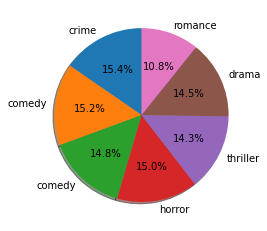

In [55]:
# Pie Chart 
pie_data = df.iloc[:7,:]
plt.pie(pie_data["imdb_score"],labels=pie_data["genres"],autopct='%1.1f%%',shadow=True,startangle=90)

## Exploring Two or more Variables

In [157]:
#Correlation Matrix
df.corr()

,release_year,imdb_score,imdb_votes
release_year,1.000000,-0.154451,-0.204364
imdb_score,-0.154451,1.000000,0.208810
imdb_votes,-0.204364,0.208810,1.000000


<Figure size 1440x720 with 0 Axes>

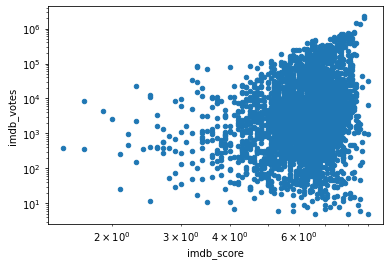

In [168]:
plt.figure(figsize=(20,10))
df.plot.scatter(x="imdb_score",y="imdb_votes")
plt.xscale("log")
plt.yscale("log")

<AxesSubplot:xlabel='imdb_score', ylabel='imdb_votes'>

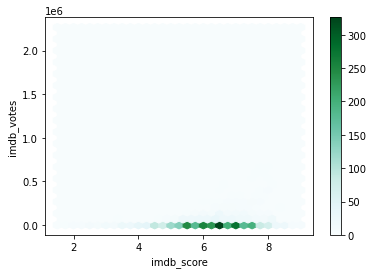

In [175]:
df.plot.hexbin(x="imdb_score",y="imdb_votes",gridsize=30,sharex=False)

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='imdb_score', ylabel='imdb_votes'>

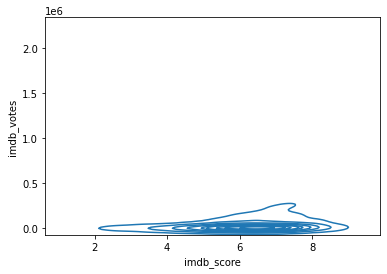

In [178]:
ax = sns.kdeplot(df["imdb_score"],df["imdb_votes"])
ax

<AxesSubplot:>

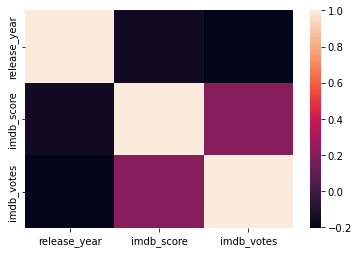

In [60]:
#Heatmap
sns.heatmap(df.corr())

In [61]:
#Contingency Table
crosstab = df[["imdb_score","genres"]].pivot_table(index="imdb_score",columns="genres",
                                                      aggfunc = lambda x : len(x),
                                                     margins=True)
crosstab.fillna(0,inplace=True)
crosstab

genres,action,animation,comedy,crime,documentation,drama,family,fantasy,history,horror,music,reality,romance,scifi,sport,thriller,war,western,All
imdb_score,,,,,,,,,,,,,,,,,,,
1.5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1.7,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1.9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2.1,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8.6,0.0,2.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7
8.7,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
8.8,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3


<AxesSubplot:xlabel='imdb_score'>

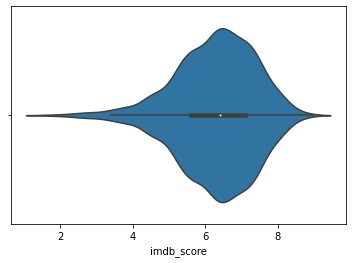

In [62]:
#Violin Plot
sns.violinplot(x=df["imdb_score"])

# Data and Sampling Distributions

In [63]:
df.head()

,title,type,release_year,imdb_score,imdb_votes,genres
0,Taxi Driver,MOVIE,1976,8.3,795222.0,crime
1,Monty Python and the Holy Grail,MOVIE,1975,8.2,530877.0,comedy
2,Life of Brian,MOVIE,1979,8.0,392419.0,comedy
3,The Exorcist,MOVIE,1973,8.1,391942.0,horror
4,Dirty Harry,MOVIE,1971,7.7,153463.0,thriller


Text(0.5, 1.0, 'Central Limit Theorem')

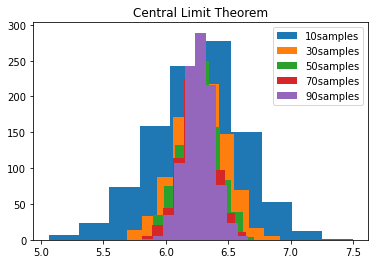

In [64]:
sample_amounts = range(10,100,20)
for x in sample_amounts :
    samples=[]
    for i in range(1000):
        samples.append(df['imdb_score'].sample(x).mean())
    plt.hist(samples)
plt.legend([str(z) + "samples" for z in sample_amounts])
plt.title("Central Limit Theorem")

In [65]:
df['imdb_score'].sem()

0.01919082729915162

In [66]:
df.head()

,title,type,release_year,imdb_score,imdb_votes,genres
0,Taxi Driver,MOVIE,1976,8.3,795222.0,crime
1,Monty Python and the Holy Grail,MOVIE,1975,8.2,530877.0,comedy
2,Life of Brian,MOVIE,1979,8.0,392419.0,comedy
3,The Exorcist,MOVIE,1973,8.1,391942.0,horror
4,Dirty Harry,MOVIE,1971,7.7,153463.0,thriller


In [67]:
from sklearn.utils import resample

results = []
for nrepeat in range(1000):
    sample = resample(df["imdb_score"])
    results.append(sample.mean())
results = pd.Series(results)
print('Bootstrap Statistics:')
print(f'original: {df["imdb_score"].mean()}')
print(f'bias: {results.mean() - df["imdb_score"].mean()}')
print(f'std. error: {results.std()}')

Bootstrap Statistics:
original: 6.265437923916264
bias: -0.00048761427309695904
std. error: 0.018997396743097205


In [68]:
resample(df["imdb_score"]).mean()

6.279946918313196

In [69]:
#Define sample data
data = df["imdb_score"].sample(20)
#Creates 95% confidence interval for population mean weight
st.t.interval(alpha=0.95,df=len(data)-1,loc=np.mean(data),scale=st.sem(data))

(6.021776042814171, 7.0182239571858265)

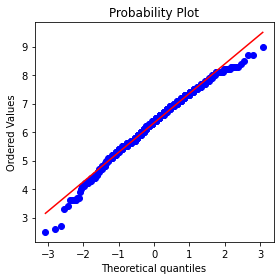

In [70]:
fig, ax = plt.subplots(figsize=(4, 4))

norm_sample = df["imdb_score"].sample(650)
stats.probplot(norm_sample, plot=ax)

plt.tight_layout()
plt.show()